# MODELADO

## Preparación de los datos

### Instalar librerías

In [22]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


### Importar librerías

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Crear DataFrame

In [24]:
df = pd.read_csv('../data/climate_change_impact_on_agriculture_2024.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


## Construcción de regresiones simples con Scikit-learn y Statsmodels

En esta sección se construyen modelos de **regresión lineal simple** utilizando las librerías 
`scikit-learn` y `statsmodels`.  
El objetivo es analizar cómo una variable independiente afecta a una variable dependiente.

Ejemplo: evaluar cómo la **temperatura promedio** influye en el **rendimiento del cultivo**.

In [25]:
X = df[['Average_Temperature_C']]   # Variable independiente
y = df['Crop_Yield_MT_per_HA']      # Variable dependiente

### Modelo de regresión simple con Scikit-learn

A continuación, se entrena un modelo de regresión lineal simple con la variable
**Average_Temperature_C** como predictor del **Crop_Yield_MT_per_HA**.


Intercepto: 1.8786610519973337
Pendiente: 0.023216123524971207


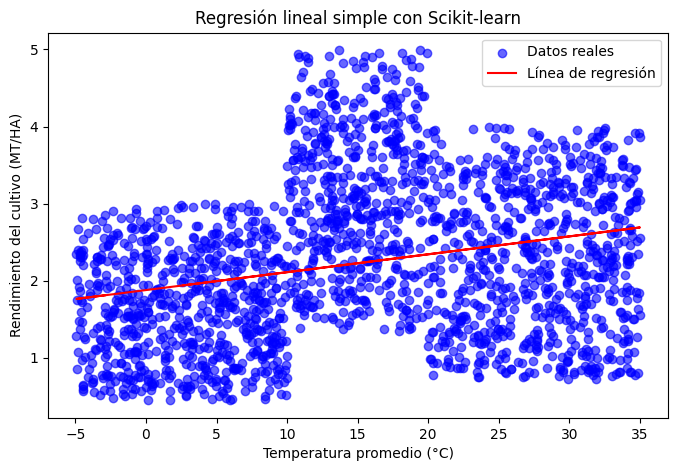

In [26]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Coeficientes
print("Intercepto:", modelo.intercept_)
print("Pendiente:", modelo.coef_[0])

# Visualización de resultados
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Datos reales', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Temperatura promedio (°C)')
plt.ylabel('Rendimiento del cultivo (MT/HA)')
plt.title('Regresión lineal simple con Scikit-learn')
plt.legend()
plt.show()

## Validación y métricas del modelo

Se evalúa el desempeño del modelo utilizando tres métricas principales:

- **R² (Coeficiente de determinación):** indica qué proporción de la variabilidad en la variable dependiente 
  es explicada por la variable independiente.  
- **MAE (Error absoluto medio):** mide el error promedio absoluto entre los valores reales y los predichos.  
- **RMSE (Raíz del error cuadrático medio):** mide la magnitud promedio del error en las predicciones.


In [27]:
# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


R²: 0.0578
MAE: 0.8189
RMSE: 0.9973


## Modelo de regresión simple con Statsmodels

La librería `statsmodels` permite obtener un resumen estadístico detallado, 
que incluye los coeficientes, errores estándar, valores t, p-valores, y el R² ajustado.


In [28]:
# Agregar constante (intercepto)
X_sm = sm.add_constant(X)

# Ajustar el modelo
modelo_sm = sm.OLS(y, X_sm).fit()

# Mostrar resumen estadístico
print(modelo_sm.summary())


                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.070
Model:                              OLS   Adj. R-squared:                  0.069
Method:                   Least Squares   F-statistic:                     747.7
Date:                  Wed, 08 Oct 2025   Prob (F-statistic):          8.05e-159
Time:                          20:38:48   Log-Likelihood:                -13812.
No. Observations:                 10000   AIC:                         2.763e+04
Df Residuals:                      9998   BIC:                         2.764e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

### Interpretación de los resultados 

El modelo trata de ver si la **temperatura promedio (°C)** tiene relación con el **rendimiento del cultivo (MT/HA)**.

**Coeficientes:**  
El intercepto es **1.8787**, o sea que si la temperatura fuera 0 °C, el rendimiento sería de unas **1.88 toneladas por hectárea**.  
La pendiente es **0.0232**, lo que quiere decir que por cada grado que sube la temperatura, el rendimiento aumenta un poco (**0.023 MT/HA**).  
En resumen, hay una **relación positiva**, pero es **muy pequeña**.

**Métricas del modelo:**  
El **R² = 0.0578** indica que solo un **5.78 % del rendimiento** se puede explicar por la temperatura.  
El **MAE = 0.8189** y el **RMSE = 0.9973** muestran que el error promedio en las predicciones es de más o menos **1 MT/HA**, o sea que el modelo **no es muy preciso**.  
Esto significa que la temperatura tiene algo que ver, pero **no explica mucho** lo que pasa con el rendimiento.

**Resultados estadísticos:**  
El coeficiente de temperatura (**0.0230**) confirma esa relación positiva.  
El valor **p < 0.001** indica que el resultado **sí es significativo**, es decir, no se debe al azar.  
Aun así, el **R² = 0.07** sigue siendo bajo, así que la temperatura **no es el único factor importante**.  
El valor **Durbin-Watson ≈ 2.0** muestra que los errores del modelo están bien distribuidos, sin patrones raros.

**Conclusión:**  
La temperatura promedio **sí influye un poco** en el rendimiento del cultivo, pero **no mucho**.  
Probablemente hay otros factores más importantes, como el agua, los nutrientes del suelo o el uso de fertilizantes.
